In [28]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Akronim|Roboto&effect=3d');
span {color:black; text-shadow:3px 3px 3px #aaa;}
div.output_prompt {color:darkblue;} 
div.input_prompt {color:#ff55ee;} 
div.output_area pre,div.output_subarea,div.output_stderr pre  
      {background-color:ghostwhite; font-size:15px; color:darkblue;}
</style>

# Datawhale 零基础入门CV赛事-Task1 赛题理解
        
本章内容将会对街景字符识别赛题进行赛题背景讲解，对赛题数据的读取进行说明，并给出集中解题思路。    
        
## 1 赛题理解   
- 赛题名称：零基础入门CV之街道字符识别             
- 赛题目标：通过这道赛题可以引导大家走入计算机视觉的世界，主要针对竞赛选手上手视觉赛题，提高对数据建模能力。       
- 赛题任务：赛题以计算机视觉中字符识别为背景，要求选手预测街道字符编码，这是一个典型的字符识别问题。      
为了简化赛题难度，赛题数据采用公开数据集[SVHN](http://ufldl.stanford.edu/housenumbers/)，因此大家可以选择很多相应的paper作为思路参考。         
        
 

### 1.1 赛题数据      
赛题以街道字符为为赛题数据，数据集报名后可见并可下载，该数据来自收集的SVHN街道字符，并进行了匿名采样处理。  

![数据示例](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/%E8%B5%9B%E4%BA%8B%E7%AE%80%E4%BB%8B/%E6%95%B0%E6%8D%AE%E9%9B%86%E6%A0%B7%E6%9C%AC%E5%B1%95%E7%A4%BA.png)
             
注意: 按照比赛规则，所有的参赛选手只能使用比赛给定的数据集完成训练，不能使用SVHN原始数据集进行训练。比赛结束后将会对Top选手进行代码审核，违规的选手将清除排行榜成绩。
         
训练集数据包括3W张照片，验证集数据包括1W张照片，每张照片包括颜色图像和对应的编码类别和具体位置；为了保证比赛的公平性，测试集A包括4W张照片，测试集B包括4W张照片。
       
需要注意的是本赛题需要选手识别图片中所有的字符，为了降低比赛难度，我们提供了训练集、验证集和测试集中所有字符的位置框。
    
### 1.2 数据标签      
对于训练数据每张图片将给出对于的编码标签，和具体的字符框的位置（训练集、测试集和验证集都给出字符位置），可用于模型训练：

 Field  | Description|
--------- | --------|
top	| 左上角坐标X |
height	| 字符高度 |
left   | 左上角最表Y |
width  | 字符宽度 |
label  | 字符编码 |

      
字符的坐标具体如下所示：     
![坐标](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/%E5%AD%97%E7%AC%A6%E5%9D%90%E6%A0%87.png)     
     
 在比赛数据（训练集、测试集和验证集）中，同一张图片中可能包括一个或者多个字符，因此在比赛数据的JSON标注中，会有两个字符的边框信息：   
 
 |原始图片|图片JSON标注|
 |----|-----|
 ![19](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/%E5%8E%9F%E5%A7%8B%E5%9B%BE%E7%89%87.png)    | ![标注](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/%E5%8E%9F%E5%A7%8B%E5%9B%BE%E7%89%87%E6%A0%87%E6%B3%A8.png)  |
 
 
 ### 1.3 评测指标     
 选手提交结果与实际图片的编码进行对比，以编码整体识别准确率为评价指标。任何一个字符错误都为错误，最终评测指标结果越大越好，具体计算公式如下：     
                                              Score=编码识别正确的数量/测试集图片数量        
     


### 1.4 数据下载 

下面的代码可以直接根据mchar_data_list_0515.csv文件，将所有相关数据集下载，并保存到当前路径的data下

In [35]:
import requests
import pandas as pd
import os
import zipfile

data=pd.read_csv('data/mchar_data_list_0515.csv')

mypath='./data/'
if not os.path.exists(mypath):
    os.makedirs(mypath)

# 下载数据

for i,link in enumerate(data['link']):
    file_name = data['file'][i]
    print(file_name, '\t', link)
    file_name = mypath  + file_name
    if not os.path.exists(file_name):
        response = requests.get(link, stream=True)
        with open( file_name, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)


# 解压数据
zip_list = ['mchar_train', 'mchar_test_a', 'mchar_val']
for little_zip in zip_list: # 卖萌可耻
    if not os.path.exists(mypath  + little_zip):
        zip_file = zipfile.ZipFile(mypath  + little_zip + '.zip', 'r')
        zip_file.extractall(path = mypath )

mchar_train.zip 	 http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_train.zip
mchar_train.json 	 http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_train.json
mchar_val.zip 	 http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_val.zip
mchar_val.json 	 http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_val.json
mchar_test_a.zip 	 http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_test_a.zip
mchar_sample_submit_A.csv 	 http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_sample_submit_A.csv


 ### 1.5 读取数据

In [29]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
train_json = json.load(open('data/mchar_train.json'))
print(len(train_json)) # 训练集大小
list(train_json.keys())[:3]

30000


['000000.png', '000001.png', '000002.png']

In [30]:
train_json['000000.png']

{'height': [219, 219],
 'label': [1, 9],
 'left': [246, 323],
 'top': [77, 81],
 'width': [81, 96]}

In [31]:
# 数据标注处理
def parse_json(d):
    arr = np.array([
        d['top'], d['height'], d['left'],  d['width'], d['label']
    ])
    arr = arr.astype(int)
    return arr
parse_json(train_json['000000.png'])

array([[ 77,  81],
       [219, 219],
       [246, 323],
       [ 81,  96],
       [  1,   9]])

- 图片000000.png

图片中可能包括2个字符


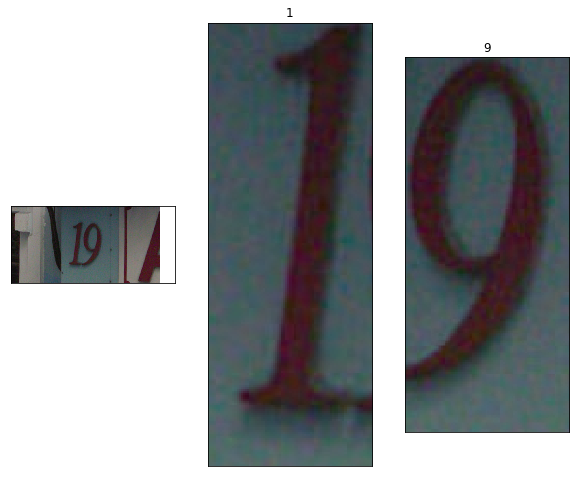

In [32]:
img = cv2.imread('./data/mchar_train/000000.png')
arr = parse_json(train_json['000000.png'])
print("图片中可能包括{}个字符".format(arr.shape[1]))

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):# 多个标注字符
    plt.subplot(1, arr.shape[1]+1, idx+2)
    plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
    plt.title(arr[4, idx])
    plt.xticks([]); plt.yticks([])

- 图片000001.png

图片中可能包括2个字符


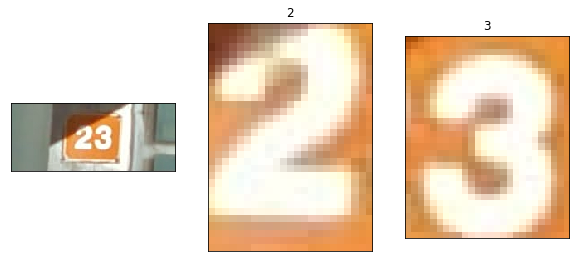

In [33]:
img = cv2.imread('./data/mchar_train/000001.png')
arr = parse_json(train_json['000001.png'])
print("图片中可能包括{}个字符".format(arr.shape[1]))

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):# 多个标注字符
    plt.subplot(1, arr.shape[1]+1, idx+2)
    plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
    plt.title(arr[4, idx])
    plt.xticks([]); plt.yticks([])

- 图片000020.png

图片中可能包括1个字符


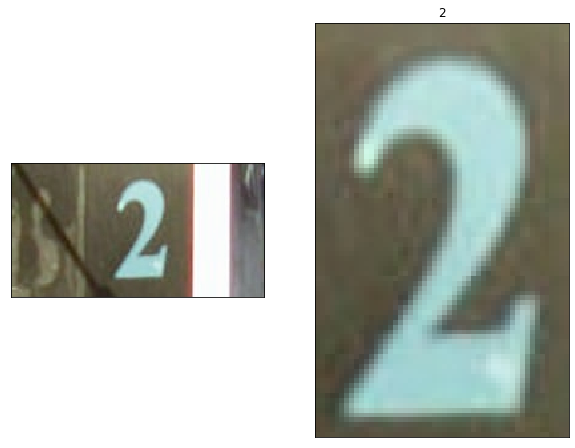

In [34]:
img = cv2.imread('./data/mchar_train/000020.png')
arr = parse_json(train_json['000020.png'])
print("图片中可能包括{}个字符".format(arr.shape[1]))

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):# 多个标注字符
    plt.subplot(1, arr.shape[1]+1, idx+2)
    plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
    plt.title(arr[4, idx])
    plt.xticks([]); plt.yticks([])

从三个例子可以看出，图片的大小，标注的字符个数以及分辨率都可能不一样。

### 1.6 解题思路      
赛题思路分析：赛题本质是分类问题，需要对图片的字符进行识别。但赛题给定的数据图片中不同图片中包含的字符数量不等，如下图所示。有的图片的字符个数为2，有的图片字符个数为3，有的图片字符个数为4。      
       
  |字符属性|图片|
 |----|-----|
 |字符：42   字符个数：2    | ![标注](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/42.png)  |
 |字符：241   字符个数：3    | ![标注](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/2411.png)  |
 |字符：7358   字符个数：4    | ![标注](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/7358.png)  |
  
因此本次赛题的难点是需要对不定长的字符进行识别，与传统的图像分类任务有所不同。为了降低参赛难度，我们提供了一些解题思路供大家参考：     
      
- 简单入门思路：定长字符识别    
     
可以将赛题抽象为一个定长字符识别问题，在赛题数据集中大部分图像中字符个数为2-4个，最多的字符    个数为6个。                 
因此可以对于所有的图像都抽象为6个字符的识别问题，字符23填充为23XXXX，字符231填充为231XXX。      
![标注](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/23xxxxxx.png)   

经过填充之后，原始的赛题可以简化了6个字符的分类问题。在每个字符的分类中会进行11个类别的分类，假如分类为填充字符，则表明该字符为空。         
- 专业字符识别思路：不定长字符识别 
        
![标注](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/%E4%B8%8D%E5%AE%9A%E9%95%BF%E5%AD%97%E7%AC%A6%E8%AF%86%E5%88%AB.png)      
            
在字符识别研究中，有特定的方法来解决此种不定长的字符识别问题，比较典型的有CRNN字符识别模型。     
在本次赛题中给定的图像数据都比较规整，可以视为一个单词或者一个句子。   

- 专业分类思路：检测再识别     
      
在赛题数据中已经给出了训练集、验证集中所有图片中字符的位置，因此可以首先将字符的位置进行识别，利用物体检测的思路完成。        
      
![IMG](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/%E6%A3%80%E6%B5%8B.png)           
            
此种思路需要参赛选手构建字符检测模型，对测试集中的字符进行识别。选手可以参考物体检测模型SSD或者YOLO来完成。    




## 2 参考资料：
- https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.6.2ce83fdft96KXS&postId=107990
- https://www.kaggle.com/olgabelitskaya/svhn-digit-recognition/data
- https://github.com/potterhsu/SVHNClassifier-PyTorch